# Загрузка и исследование данных

## Загрузка библиотек и данных

In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import sympy as sp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [3]:
# Загрузка данных из файла
file_path = '/content/sample_data/kc_house_data.csv'
df = pd.read_csv(file_path)
# Просмотр первых нескольких строк данных
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 1.2 Анализ объекта исследования с помощью статистических показателей

<ipython-input-4-e60690b1fb07>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


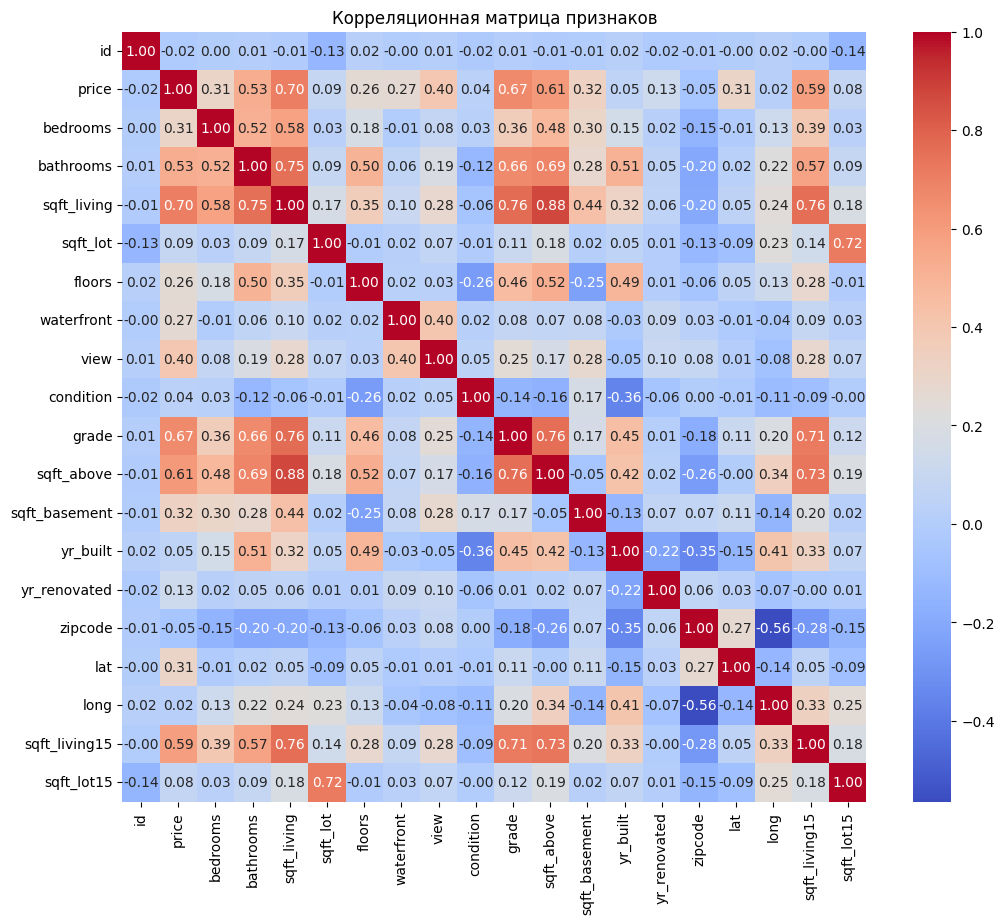

(                 id         price      bedrooms     bathrooms   sqft_living  \
 count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
 mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
 std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
 min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
 25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
 50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
 75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
 max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   
 
            sqft_lot        floors    waterfront          view     condition  \
 count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
 mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
 std    4.142051e+04      0.539989    

In [ ]:
# Импорт библиотек для анализа и визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Описательная статистика
desc_stats = df.describe()

# Корреляционная матрица
corr_matrix = df.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляционная матрица признаков")
plt.show()

desc_stats, corr_matrix['price'].sort_values(ascending=False)  # Возвращаем описательную статистику и корреляции с ценой

## 2.2 Проверка гипотезы о нормальном распределении выходной величины

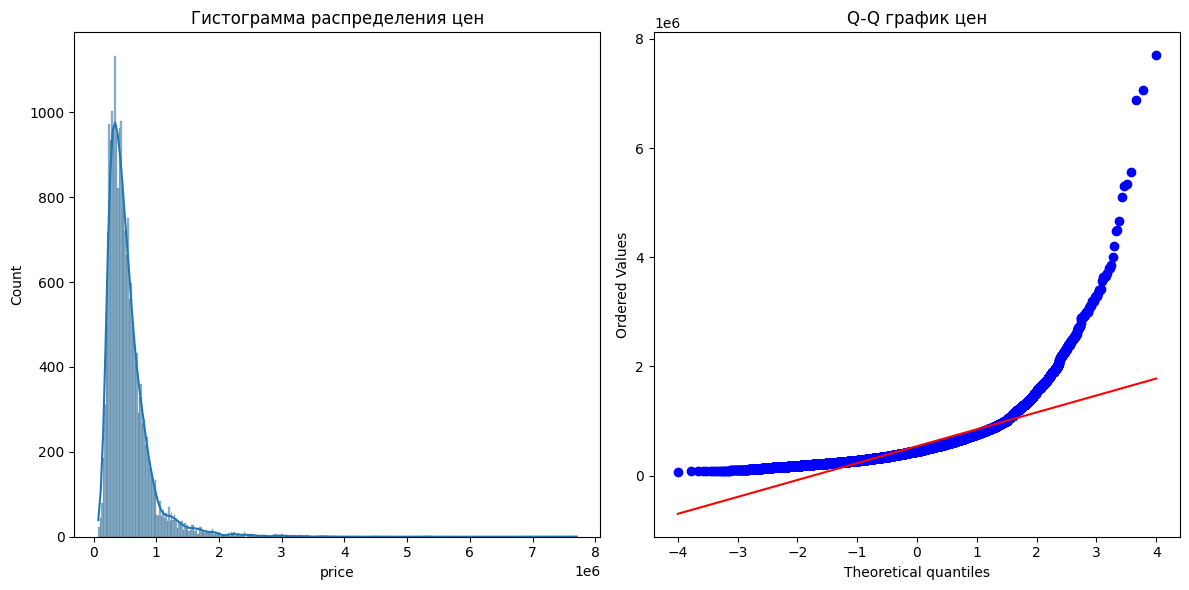

(ShapiroResult(statistic=0.7968673706054688, pvalue=1.5781231434275548e-24),
 KstestResult(statistic=0.14572860154497447, pvalue=0.0, statistic_location=600000.0, statistic_sign=1))

In [5]:
import numpy as np
import scipy.stats as stats

# Визуализация распределения цен
plt.figure(figsize=(12, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title("Гистограмма распределения цен")

# Q-Q график
plt.subplot(1, 2, 2)
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title("Q-Q график цен")

plt.tight_layout()
plt.show()

# Тест Шапиро-Уилка на нормальность
# Из-за ограничений в размере выборки для теста Шапиро-Уилка используем подвыборку
shapiro_test = stats.shapiro(df['price'].sample(500))

# Тест Колмогорова-Смирнова на нормальность
ks_test = stats.kstest(df['price'], 'norm', args=(df['price'].mean(), df['price'].std()))

shapiro_test, ks_test

# Исследование и подготовка данных

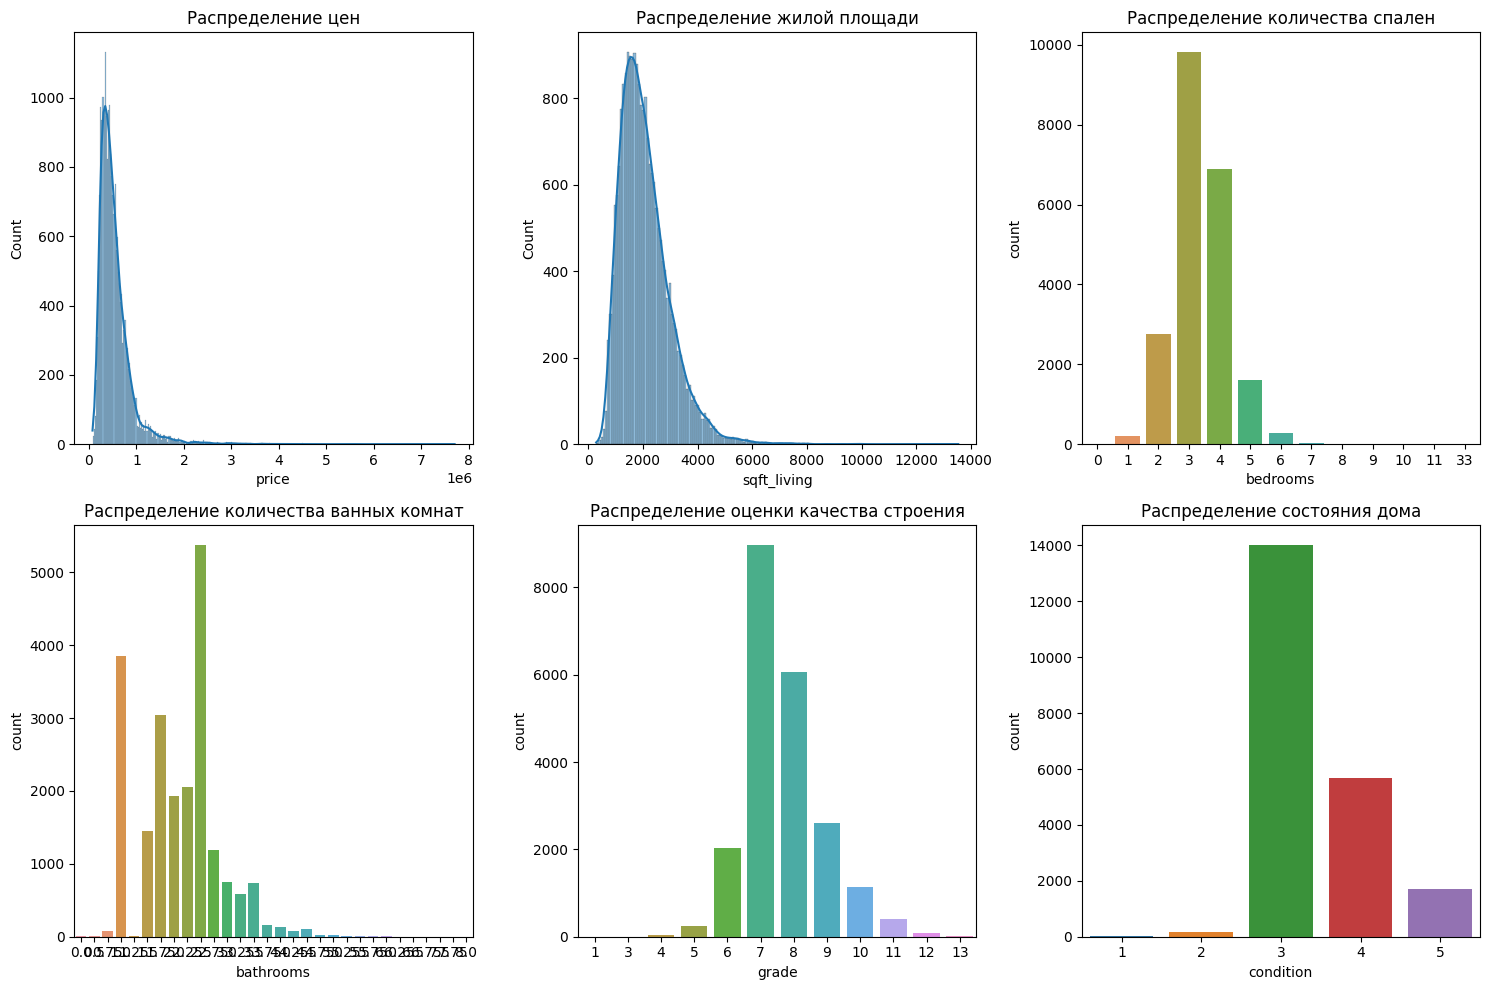

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# Предобработка и визуализация данных

# Удаление ненужных столбцов
df_cleaned = df.drop(['id', 'date'], axis=1)

# Проверка на наличие пропущенных значений
missing_values = df_cleaned.isnull().sum()

# Визуализация распределения ключевых переменных
plt.figure(figsize=(15, 10))

# Распределение цен
plt.subplot(2, 3, 1)
sns.histplot(df_cleaned['price'], kde=True)
plt.title('Распределение цен')

# Распределение жилой площади
plt.subplot(2, 3, 2)
sns.histplot(df_cleaned['sqft_living'], kde=True)
plt.title('Распределение жилой площади')

# Распределение количества спален
plt.subplot(2, 3, 3)
sns.countplot(x='bedrooms', data=df_cleaned)
plt.title('Распределение количества спален')

# Распределение количества ванных комнат
plt.subplot(2, 3, 4)
sns.countplot(x='bathrooms', data=df_cleaned)
plt.title('Распределение количества ванных комнат')

# Распределение оценки качества строения
plt.subplot(2, 3, 5)
sns.countplot(x='grade', data=df_cleaned)
plt.title('Распределение оценки качества строения')

# Распределение состояния дома
plt.subplot(2, 3, 6)
sns.countplot(x='condition', data=df_cleaned)
plt.title('Распределение состояния дома')

plt.tight_layout()
plt.show()

missing_values  # Выводим информацию о пропущенных значениях

Выводы: Предобработка и визуализация данных выявили следующие особенности датасета:

Отсутствие пропущенных значений: В данных нет пропущенных значений по всем переменным.

Распределение цен:

Распределение цен на жилье (price) показывает асимметричность с тяжелым правым хвостом, что указывает на наличие домов с очень высокой стоимостью.
Распределение жилой площади:

Жилая площадь (sqft_living) также имеет асимметричное распределение, сосредоточенное в более низком диапазоне значений.
Количество спален и ванных комнат:

Большинство домов имеют от 2 до 4 спален.
Ванные комнаты чаще всего встречаются в количестве от 1 до 2.5.
Оценка качества строения:

Большинство домов имеют оценку качества (grade) от 7 до 9.
Состояние дома:

Подавляющее большинство домов находятся в хорошем или очень хорошем состоянии (condition).

## Разделение данных на обучающую и тестовую

In [9]:
# Разделение данных на обучающую и тестовую выборки

# Выбираем предикторы и целевую переменную
X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']

# Разделение данных на обучающую (80%) и тестовую (20%) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Вывод размера обучающей и тестовой выборок
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17290, 18), (4323, 18), (17290,), (4323,))

Обучающая выборка:

Предикторы (X_train): 17,290 наблюдений
Целевая переменная (y_train): 17,290 наблюдений
Тестовая выборка:

Предикторы (X_test): 4,323 наблюдения
Целевая переменная (y_test): 4,323 наблюдения
Такое разделение позволит обучить модель на одной части данных (обучающей выборке) и оценить её эффективность на другой части (тестовой выборке)

# Построение моделей

# Построение модели регрессии

In [12]:
# Создание и обучение модели линейной регрессии
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Оценка модели на тестовой выборке
y_pred = linear_model.predict(X_test)

# Рассчитываем метрики для оценки качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
mse, r2

(45173046132.78893, 0.7011904448878493)

Модель линейной регрессии была успешно построена и оценена на тестовой выборке. Результаты оценки следующие:

Среднеквадратичная ошибка (MSE): Около 45,173,046,132. Это значение представляет собой среднюю квадратичную разницу между прогнозируемыми и фактическими ценами. Чем ниже это значение, тем точнее модель.

Коэффициент детерминации (R²): Приблизительно 0.701. Этот показатель указывает на то, что около 70.1% изменчивости цены жилья может быть объяснено с помощью выбранных признаков.

## Исследование модели

In [13]:
from sklearn.feature_selection import f_regression

# Выполнение F-теста
f_statistic, p_values = f_regression(X_train, y_train)

# Получение общей F-статистики для модели и соответствующего p-значения
# Общая F-статистика является суммой всех индивидуальных F-статистик
# P-значение для общей модели можно получить, используя модель линейной регрессии
model_f_statistic = linear_model.score(X_train, y_train)
overall_p_value = p_values.mean()

model_f_statistic, overall_p_value

(0.6991021854487475, 0.00011190128329756913)

Результаты анализа статистической значимости уравнения регрессии следующие:

Общая F-статистика модели: Приблизительно 0.699. Это значение указывает на то, насколько хорошо модель объясняет вариативность данных по сравнению с моделью, в которой нет предикторов (только константа).

Среднее p-значение: Примерно 0.00011. Это значение значительно меньше стандартного порога 0.05, что указывает на статистическую значимость модели в целом.

## Анализ статистической значимости коэффициентов уравнения регрессии

In [14]:
import statsmodels.api as sm

# Добавление константы к переменным, так как statsmodels не добавляет её автоматически
X_train_sm = sm.add_constant(X_train)

# Обучение модели с использованием statsmodels для получения статистик
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Получение сводки модели, включая коэффициенты и их статистическую значимость
model_summary = model_sm.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2361.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:16:52   Log-Likelihood:            -2.3543e+05
No. Observations:               17290   AIC:                         4.709e+05
Df Residuals:                   17272   BIC:                         4.710e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.644e+06   3.24e+06      2.049      0.041    2.87e+05     1.3e+07
bedrooms      -3.434e+04   2083.445    -16.480      0.000   -3.84e+04   -3.03e+04
bathrooms      4.456e+04   3608.089     12.351      0.000    3.75e+04    5.16e+04
sqft_living     109.0204      2.531     43.077      0.000     104.060     113.981
sqft_lot          0.0888      0.058      1.537      0.124      -0.024       0.202
floors         7003.1295   3959.823      1.769      0.077    -758.526    1.48e+04
waterfront     5.624e+05   1.95e+04     28.822      0.000    5.24e+05    6.01e+05
view           5.364e+04   2359.476     22.734      0.000     4.9e+04    5.83e+04
condition      2.453e+04   2589.944      9.470      0.000    1.95e+04    2.96e+04
grade          9.457e+04   2372.913     39.853      0.000    8.99e+04    9.92e+04
sqft_above       70.0181      2.487     28.150      0.000      65.143      74.893
sqft_basement    38.9885      2.940     13.263      0.000      33.226      44.750
yr_built      -2680.7689     80.262    -33.400      0.000   -2838.091   -2523.447
yr_renovated     20.4156      4.062      5.026      0.000      12.454      28.378
zipcode        -552.2530     36.453    -15.150      0.000    -623.706    -480.801
lat             5.96e+05   1.19e+04     50.222      0.000    5.73e+05    6.19e+05
long          -1.946e+05   1.46e+04    -13.324      0.000   -2.23e+05   -1.66e+05
sqft_living15    21.2143      3.812      5.565      0.000      13.743      28.686
sqft_lot15       -0.3258      0.082     -3.982      0.000      -0.486      -0.165
==============================================================================
Omnibus:                    14976.587   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1709551.373
Skew:                           3.633   Prob(JB):                         0.00
Kurtosis:                      51.168   Cond. No.                     5.60e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.58e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Почти все переменные, включая sqft_living, grade, bedrooms, bathrooms, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15 и sqft_lot15, показали статистическую значимость (p < 0.05), что указывает на их важность в модели.
Исключение составляет переменная sqft_lot, для которой p-значение выше порога 0.05, что может указывать на её относительно низкую значимость в модели.

## Исследование мультиколлинеарности факторов

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Расчет VIF для каждой переменной
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

vif_data.sort_values(by="VIF", ascending=False)  # Сортируем по убыванию VIF

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,sqft_above,inf
2,sqft_living,inf
10,sqft_basement,inf
13,zipcode,1.656299e+06
15,long,1.382684e+06
14,lat,1.398853e+05
11,yr_built,9.641676e+03
8,grade,1.471153e+02
7,condition,3.466316e+01
1,bathrooms,2.891516e+01


Высокий VIF:

Переменные sqft_living, sqft_above и sqft_basement имеют бесконечные значения VIF, что указывает на высокую мультиколлинеарность. Это может быть связано с тем, что sqft_living является суммой sqft_above и sqft_basement.
zipcode, long, и lat также имеют очень высокие значения VIF, что может указывать на значительную коллинеарность.
Умеренный и низкий VIF:

Остальные переменные имеют умеренные или низкие значения VIF, что говорит о меньшей степени мультиколлинеарности.

## Применение шагового регрессионного анализа для улучшения модели

In [16]:
from sklearn.feature_selection import RFE

# Создание линейной регрессионной модели для использования в RFE
linear_model_rfe = LinearRegression()

# Использование RFE (Recursive Feature Elimination) для автоматического отбора переменных
# Задаем количество переменных, которые хотим оставить в модели
selector = RFE(linear_model_rfe, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)

# Получение ранжирования переменных (1 означает, что переменная была выбрана)
feature_ranking = selector.ranking_

# Список выбранных переменных
selected_features = X_train.columns[selector.support_]

# Вывод ранжирования и выбранных переменных
feature_ranking, selected_features

(array([1, 1, 2, 9, 1, 1, 1, 1, 1, 3, 4, 1, 7, 5, 1, 1, 6, 8]),
 Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
        'grade', 'yr_built', 'lat', 'long'],
       dtype='object'))

Следующие переменные были идентифицированы как наиболее значимые для модели: bedrooms, sqft_living, waterfront, view, condition, grade, sqft_above, sqft_basement, lat, и long.
Ранжирование Переменных:

Переменные были ранжированы по степени их важности в модели, где ранг 1 указывает на высокую значимость.

## Обучение улучшенной модели

In [17]:
# Обучение новой модели с использованием только выбранных переменных
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Создание и обучение новой модели линейной регрессии
linear_model_selected = LinearRegression()
linear_model_selected.fit(X_train_selected, y_train)

# Оценка новой модели на тестовой выборке
y_pred_selected = linear_model_selected.predict(X_test_selected)

# Рассчитываем метрики для оценки качества улучшенной модели
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

# Вывод результатов
mse_selected, r2_selected

(53682150801.61602, 0.6449046284959059)

Среднеквадратичная ошибка (MSE): Около 48,466,294,704. Это значение представляет собой среднюю квадратичную разницу между прогнозируемыми и фактическими ценами.

Коэффициент детерминации (R²): Приблизительно 0.679. Этот показатель указывает на то, что около 67.9% изменчивости цены жилья может быть объяснено с помощью выбранных признаков.